# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric"

    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=avarua&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 1 of Set 1 | avarua
https://api.openweathermap.org/data/2.5/weather?q=port mathurin&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 2 of Set 1 | port mathurin
https://api.openweathermap.org/data/2.5/weather?q=ar rutbah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 3 of Set 1 | ar rutbah
https://api.openweathermap.org/data/2.5/weather?q=yelm&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 4 of Set 1 | yelm
https://api.openweathermap.org/data/2.5/weather?q=blackmans bay&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 5 of Set 1 | blackmans bay
https://api.openweathermap.org/data/2.5/weather?q=isafjordur&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of Set 1 | isafjordur
https://api.openweat

https://api.openweathermap.org/data/2.5/weather?q=maridi&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 3 of Set 2 | maridi
https://api.openweathermap.org/data/2.5/weather?q=badger&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 4 of Set 2 | badger
https://api.openweathermap.org/data/2.5/weather?q=kingston&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 5 of Set 2 | kingston
https://api.openweathermap.org/data/2.5/weather?q=san pedro pochutla&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of Set 2 | san pedro pochutla
https://api.openweathermap.org/data/2.5/weather?q=seven pagodas&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 7 of Set 2 | seven pagodas
https://api.openweathermap.org/data/2.5/weather?q=ilulissat&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 8 of Set 2 | ilulissat
https://api.openweathermap.org/data/2.5/weather?q=broome&appid=8f69b0d

https://api.openweathermap.org/data/2.5/weather?q=tadine&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of Set 3 | tadine
https://api.openweathermap.org/data/2.5/weather?q=naze&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 7 of Set 3 | naze
https://api.openweathermap.org/data/2.5/weather?q=pirallahi&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 8 of Set 3 | pirallahi
https://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 9 of Set 3 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?q=port blair&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 10 of Set 3 | port blair
https://api.openweathermap.org/data/2.5/weather?q=udachny&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 11 of Set 3 | udachny
https://api.openweathermap.org/data/2.5/weather?q=codrington&appid=8f69b0d90ac3d06edbf47543e3647

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=tazovsky&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 9 of Set 4 | tazovsky
https://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 10 of Set 4 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?q=geraldton&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 11 of Set 4 | geraldton
https://api.openweathermap.org/data/2.5/weather?q=saint-leu&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 12 of Set 4 | saint-leu
https://api.openweathermap.org/data/2.5/weather?q=kibre mengist&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 13 of Set 4 | kibre mengist
https://api.openweathermap.org/data/2.5/weather?q=barclayville&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 14 of Set 4 | barclayville
https://api.openweatherma

https://api.openweathermap.org/data/2.5/weather?q=keetmanshoop&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 12 of Set 5 | keetmanshoop
https://api.openweathermap.org/data/2.5/weather?q=sisimiut&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 13 of Set 5 | sisimiut
https://api.openweathermap.org/data/2.5/weather?q=klaksvik&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 14 of Set 5 | klaksvik
https://api.openweathermap.org/data/2.5/weather?q=tommot&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 15 of Set 5 | tommot
https://api.openweathermap.org/data/2.5/weather?q=songyuan&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 16 of Set 5 | songyuan
https://api.openweathermap.org/data/2.5/weather?q=lorengau&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 17 of Set 5 | lorengau
https://api.openweathermap.org/data/2.5/weather?q=valley city&appid=8f69b0d90ac3d06e

https://api.openweathermap.org/data/2.5/weather?q=piti village&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 16 of Set 6 | piti village
https://api.openweathermap.org/data/2.5/weather?q=sao gabriel da cachoeira&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 17 of Set 6 | sao gabriel da cachoeira
https://api.openweathermap.org/data/2.5/weather?q=bol&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 18 of Set 6 | bol
https://api.openweathermap.org/data/2.5/weather?q=kidal&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 19 of Set 6 | kidal
https://api.openweathermap.org/data/2.5/weather?q=novyy urgal&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 20 of Set 6 | novyy urgal
https://api.openweathermap.org/data/2.5/weather?q=laguna&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 21 of Set 6 | laguna
https://api.openweathermap.org/data/2.5/weather?q=constantia&a

https://api.openweathermap.org/data/2.5/weather?q='ohonua&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 19 of Set 7 | 'ohonua
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=la sarre&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 20 of Set 7 | la sarre
https://api.openweathermap.org/data/2.5/weather?q=riacho de santana&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 21 of Set 7 | riacho de santana
https://api.openweathermap.org/data/2.5/weather?q=kaoma&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 22 of Set 7 | kaoma
https://api.openweathermap.org/data/2.5/weather?q=tazacorte&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 23 of Set 7 | tazacorte
https://api.openweathermap.org/data/2.5/weather?q=alotau&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 24 of Set 7 | alotau
City not found. Skipping...
https://api.openweatherm

https://api.openweathermap.org/data/2.5/weather?q=weno&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 22 of Set 8 | weno
https://api.openweathermap.org/data/2.5/weather?q=holualoa&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 23 of Set 8 | holualoa
https://api.openweathermap.org/data/2.5/weather?q=kataragama&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 24 of Set 8 | kataragama
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=new norfolk&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 25 of Set 8 | new norfolk
https://api.openweathermap.org/data/2.5/weather?q=withernsea&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 26 of Set 8 | withernsea
https://api.openweathermap.org/data/2.5/weather?q=aykhal&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 27 of Set 8 | aykhal
https://api.openweathermap.org/data/2.5/weather?q=ruteng&a

https://api.openweathermap.org/data/2.5/weather?q=komsomol'skiy&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 25 of Set 9 | komsomol'skiy
https://api.openweathermap.org/data/2.5/weather?q=chok chai&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 26 of Set 9 | chok chai
https://api.openweathermap.org/data/2.5/weather?q=concepcion del oro&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 27 of Set 9 | concepcion del oro
https://api.openweathermap.org/data/2.5/weather?q=deniliquin&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 28 of Set 9 | deniliquin
https://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 29 of Set 9 | kruisfontein
https://api.openweathermap.org/data/2.5/weather?q=jobner&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 30 of Set 9 | jobner
https://api.openweathermap.org/data/2.5/weather?

https://api.openweathermap.org/data/2.5/weather?q=lluta&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 28 of Set 10 | lluta
https://api.openweathermap.org/data/2.5/weather?q=pogranichnyy&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 29 of Set 10 | pogranichnyy
https://api.openweathermap.org/data/2.5/weather?q=baki&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 30 of Set 10 | baki
https://api.openweathermap.org/data/2.5/weather?q=toga village&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 31 of Set 10 | toga village
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=moral de calatrava&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 32 of Set 10 | moral de calatrava
https://api.openweathermap.org/data/2.5/weather?q=gamboma&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 33 of Set 10 | gamboma
https://api.openweathermap.org/dat

https://api.openweathermap.org/data/2.5/weather?q=murun-kuren&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 30 of Set 11 | murun-kuren
https://api.openweathermap.org/data/2.5/weather?q=porto seguro&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 31 of Set 11 | porto seguro
https://api.openweathermap.org/data/2.5/weather?q=al kharijah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 32 of Set 11 | al kharijah
https://api.openweathermap.org/data/2.5/weather?q=vorgashor&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 33 of Set 11 | vorgashor
https://api.openweathermap.org/data/2.5/weather?q=polyarnyy&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 34 of Set 11 | polyarnyy
https://api.openweathermap.org/data/2.5/weather?q=thinadhoo&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 35 of Set 11 | thinadhoo
https://api.openweathermap.org/data/2.5/weather?q=puerto

https://api.openweathermap.org/data/2.5/weather?q=charters towers&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 32 of Set 12 | charters towers
https://api.openweathermap.org/data/2.5/weather?q=mariehamn&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 33 of Set 12 | mariehamn
https://api.openweathermap.org/data/2.5/weather?q=christchurch&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 34 of Set 12 | christchurch
https://api.openweathermap.org/data/2.5/weather?q=homer&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 35 of Set 12 | homer
https://api.openweathermap.org/data/2.5/weather?q=mangalia&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 36 of Set 12 | mangalia
https://api.openweathermap.org/data/2.5/weather?q=luganville&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 37 of Set 12 | luganville
https://api.openweathermap.org/data/2.5/weather?q=arica&appi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,28.03,83,20,5.66,CK,1715289097
1,port mathurin,-19.6833,63.4167,25.22,76,100,10.09,MU,1715289097
2,ar rutbah,33.0381,40.2848,22.34,19,4,6.72,IQ,1715289098
3,yelm,46.9420,-122.6060,24.38,52,6,0.89,US,1715288822
4,blackmans bay,-43.0167,147.3167,11.52,96,99,1.67,AU,1715289099


In [8]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,28.03,83,20,5.66,CK,1715289097
1,port mathurin,-19.6833,63.4167,25.22,76,100,10.09,MU,1715289097
2,ar rutbah,33.0381,40.2848,22.34,19,4,6.72,IQ,1715289098
3,yelm,46.9420,-122.6060,24.38,52,6,0.89,US,1715288822
4,blackmans bay,-43.0167,147.3167,11.52,96,99,1.67,AU,1715289099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

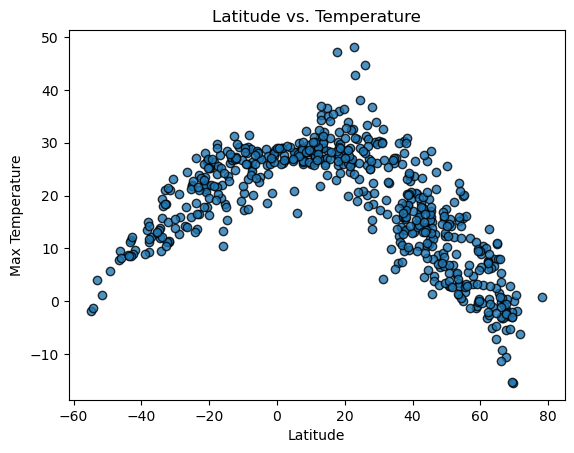

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature') 
plt.ylabel('Max Temperature') 
plt.xlabel('Latitude') 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

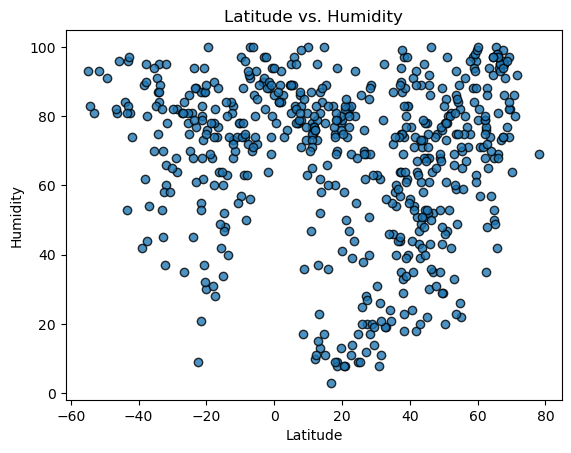

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')  
plt.ylabel('Humidity')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

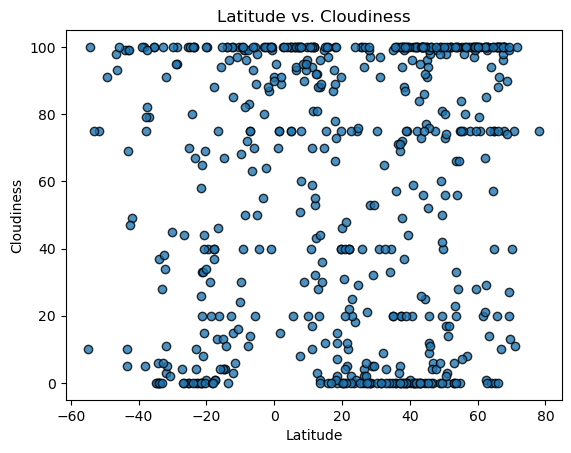

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

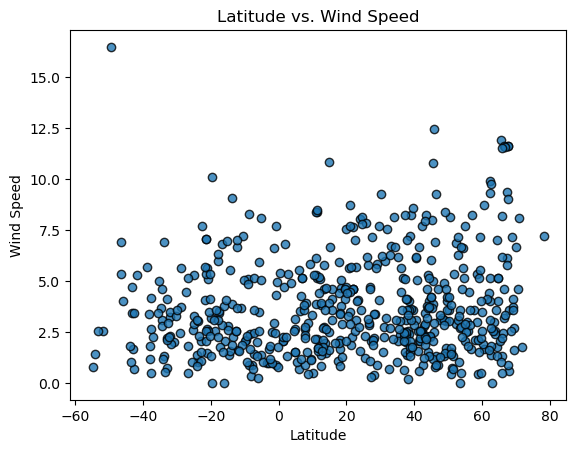

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, annotation_position):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    return slope, intercept, regress_values, line_eq

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ar rutbah,33.0381,40.2848,22.34,19,4,6.72,IQ,1715289098
3,yelm,46.9420,-122.6060,24.38,52,6,0.89,US,1715288822
5,isafjordur,66.0755,-23.1240,3.61,69,88,2.44,IS,1715289099
6,hamilton,39.1834,-84.5333,22.69,83,75,8.23,US,1715289099
7,bethel,41.3712,-73.4140,20.30,54,0,2.06,US,1715289100


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,28.03,83,20,5.66,CK,1715289097
1,port mathurin,-19.6833,63.4167,25.22,76,100,10.09,MU,1715289097
4,blackmans bay,-43.0167,147.3167,11.52,96,99,1.67,AU,1715289099
9,waitangi,-43.9535,-176.5597,8.79,84,99,1.79,NZ,1715289101
14,karratha,-20.7377,116.8463,22.04,37,44,5.09,AU,1715289103


###  Temperature vs. Latitude Linear Regression Plot

NameError: name 'correlation' is not defined

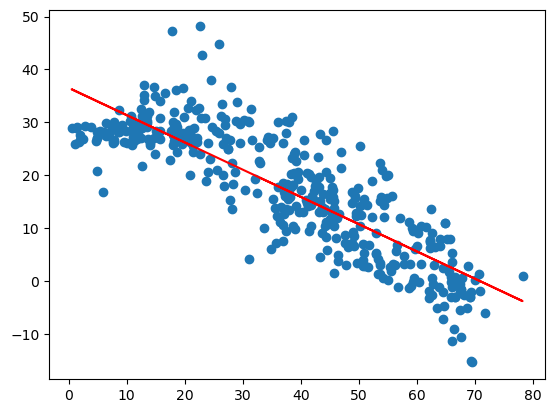

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Max Temp vs. Latitude', 'Max Temp', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

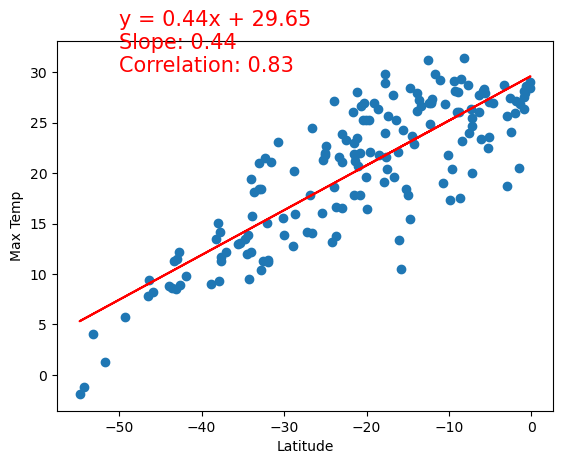

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Max Temp vs. Latitude', 'Max Temp', (-50, 30))

# scatter plot
correlation = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

### **Discussion about the linear relationship:** 
Both the Northern and Southern Hemisphere showed strong correlations between Latitude and Max Temperature. We can observe this with the correlation score. Both have a correlation score of 0.79, which is a strong correlation. 0.8 is considered to be a "very strong" correlation, and we see a correlation just 0.01 below that with both graphs above.

### Humidity vs. Latitude Linear Regression Plot 

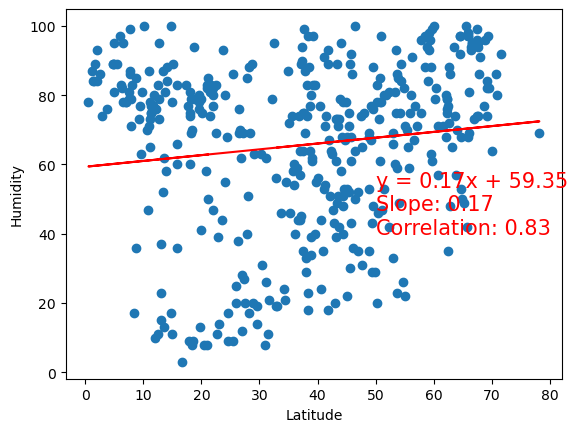

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Humidity vs. Latitude', 'Humidity', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

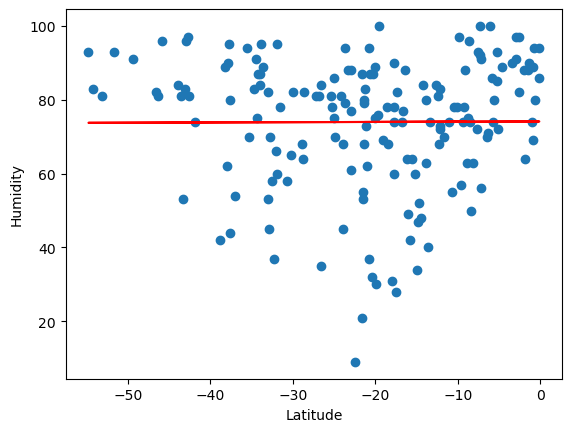

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Humidity vs. Latitude', 'Humidity', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

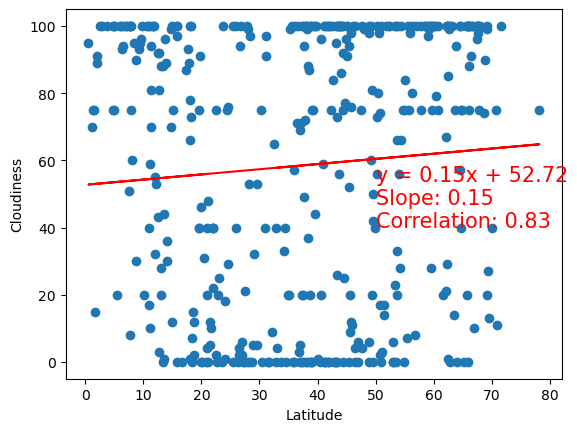

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Cloudiness vs. Latitude', 'Cloudiness', (50, 40))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (50, 40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

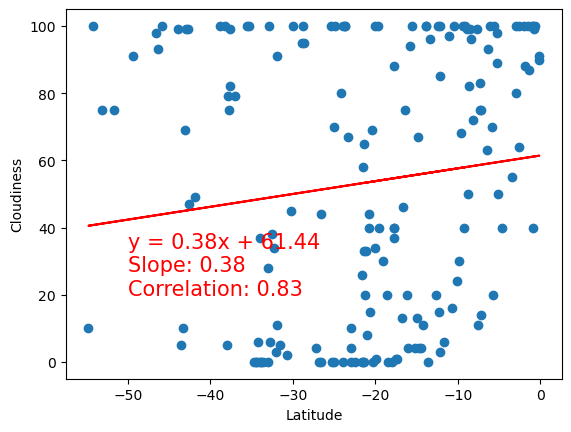

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Cloudiness vs. Latitude', 'Cloudiness', (-50, 20))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

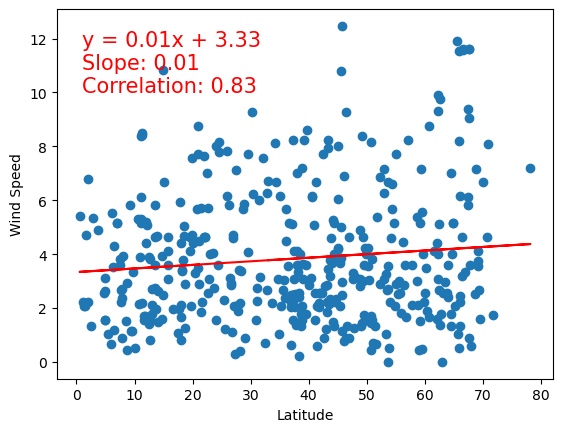

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Wind Speed vs. Latitude', 'Wind Speed', (1, 10))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (1, 10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

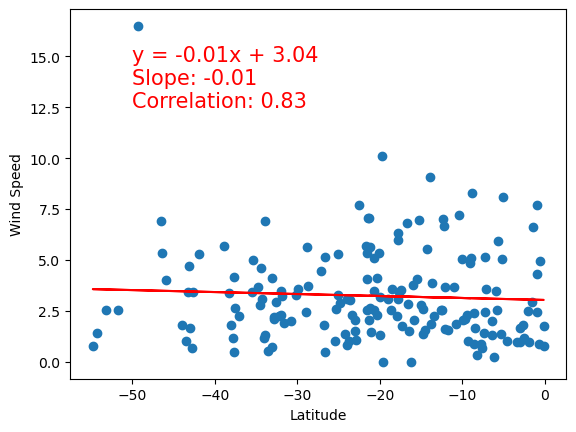

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, regress_values, line_eq = plot_linear_regression(
    x_values, y_values, 'Wind Speed vs. Latitude', 'Wind Speed', (-50, 12.5))

# scatter plot
correlation1 = np.corrcoef(x_values, y_values)[0, 1]
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq + f'\nSlope: {slope:.2f}\nCorrelation: {correlation:.2f}',
             (-50, 12.5), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE